In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 4000
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA

import sys
sys.path.append('../.')
from lib import get_data

In [4]:
df = get_data.get_model_data(date_range=(0,7), pred_day=7)
df.head()

,state,county,fips,cases,deaths,cldCvrMin,cldCvrAvg,cldCvrMax,dewPtMin,dewPtAvg,...,retail_and_recreation_percent_change_from_baseline,residential_percent_change_from_baseline,workplaces_percent_change_from_baseline,transit_stations_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,income_2018,pop_2018,day_7_delta_cases,day_7_delta_deaths
0,alabama,autauga,1001,11.500,0.375,0.250,31.250,81.625000,48.762500,52.875000,...,-31.500,16.50,-38.000000,NaN,9.875,NaN,41618.0,55601.0,-20,1
1,alabama,baldwin,1003,20.875,0.500,0.000,31.250,86.625000,47.662500,53.725000,...,-42.125,12.25,-31.875000,-24.5,-12.500,-33.5,45596.0,218022.0,17,0
2,alabama,barbour,1005,12.625,0.000,0.000,24.000,66.583333,41.627083,49.241667,...,NaN,NaN,-31.000000,NaN,NaN,NaN,35199.0,24881.0,-11,-1
3,alabama,bibb,1007,16.000,0.000,0.000,26.375,60.375000,36.375000,44.337500,...,NaN,NaN,-32.333333,NaN,NaN,NaN,30254.0,22400.0,6,0
4,alabama,blount,1009,10.625,0.000,0.075,30.950,89.750000,41.680000,47.140000,...,-29.250,16.80,-34.750000,NaN,0.000,NaN,34976.0,57840.0,-12,0


In [5]:
df.shape

(1455, 70)

In [6]:
# select only numeric data, drop fips column, drop rows with NA
dfnum = df._get_numeric_data().drop(['fips'],axis=1).dropna()
dfnum.head()

,cases,deaths,cldCvrMin,cldCvrAvg,cldCvrMax,dewPtMin,dewPtAvg,dewPtMax,feelsLikeMin,feelsLikeAvg,...,retail_and_recreation_percent_change_from_baseline,residential_percent_change_from_baseline,workplaces_percent_change_from_baseline,transit_stations_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,income_2018,pop_2018,day_7_delta_cases,day_7_delta_deaths
1,20.875,0.500,0.0000,31.250000,86.6250,47.662500,53.725000,59.63750,56.025000,67.625000,...,-42.125,12.250000,-31.875,-24.500,-12.500,-33.500000,45596.0,218022.0,17,0
14,21.000,1.000,0.0625,31.833333,89.0625,43.135417,48.777083,54.99375,51.904167,62.291667,...,-37.250,14.142857,-34.625,-30.250,4.500,41.714286,39607.0,83442.0,12,1
16,14.125,0.000,0.2500,30.875000,91.8750,40.800000,47.112500,53.85000,48.525000,60.212500,...,-37.625,14.000000,-31.000,-37.000,-4.125,-4.000000,31916.0,71385.0,-3,-2
18,29.875,2.625,0.0000,24.125000,71.7500,46.350000,51.062500,55.22500,49.175000,62.375000,...,-38.000,13.000000,-35.625,-31.625,-3.875,-23.000000,36918.0,102501.0,30,4
22,23.500,1.000,0.0000,33.000000,96.0000,50.900000,56.825000,62.66250,59.712500,70.425000,...,-42.250,13.625000,-34.500,-31.875,-9.125,3.500000,42398.0,104722.0,17,1


In [7]:
scaler = preprocessing.StandardScaler().fit(dfnum)
dfnum = pd.DataFrame(scaler.fit_transform(dfnum), columns=dfnum.columns)

In [8]:
dfnum.head()

,cases,deaths,cldCvrMin,cldCvrAvg,cldCvrMax,dewPtMin,dewPtAvg,dewPtMax,feelsLikeMin,feelsLikeAvg,...,retail_and_recreation_percent_change_from_baseline,residential_percent_change_from_baseline,workplaces_percent_change_from_baseline,transit_stations_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,income_2018,pop_2018,day_7_delta_cases,day_7_delta_deaths
0,-0.509704,-0.024296,-0.959536,-0.571847,0.242575,0.889439,0.974134,1.070522,1.166349,1.289460,...,-0.413515,-0.880616,0.696355,0.502174,-0.276955,-1.260251,-0.428997,-0.308188,0.038655,-0.043333
1,-0.503183,0.545374,-0.952593,-0.540211,0.376829,0.532677,0.565529,0.670108,0.853640,0.887263,...,0.054692,-0.390282,0.392182,0.135150,1.272003,1.107913,-0.836095,-0.505288,-0.039421,0.443940
2,-0.861822,-0.593966,-0.931764,-0.592185,0.531737,0.348631,0.428066,0.571487,0.597212,0.730470,...,0.018676,-0.427288,0.793138,-0.295704,0.486135,-0.331427,-1.358886,-0.522946,-0.273649,-1.017877
3,-0.040213,2.396801,-0.959536,-0.958260,-0.576720,0.786006,0.754261,0.690048,0.646537,0.893548,...,-0.017340,-0.686332,0.281573,0.047383,0.508913,-0.929653,-1.018878,-0.477375,0.241653,1.905756
4,-0.372769,0.545374,-0.959536,-0.476939,0.758937,1.144575,1.230135,1.331357,1.446175,1.500613,...,-0.425520,-0.524430,0.406008,0.031426,0.030559,-0.095286,-0.646379,-0.474122,0.038655,0.443940


In [28]:
full_pca = PCA(random_state=0).fit(dfnum)
full_pca.n_components_

67

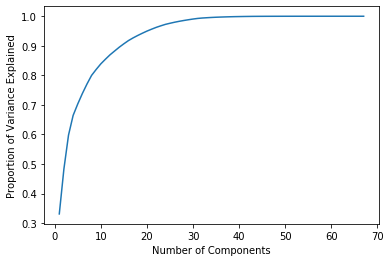

In [29]:
# Calculate the cumulative sum of the variance explained by each component.
cum_exp_var = np.cumsum(full_pca.explained_variance_ratio_)
plt.plot(np.arange(len(cum_exp_var))+1, cum_exp_var)
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance Explained');

In [30]:
cum_exp_var_df = pd.DataFrame([cum_exp_var], columns=np.arange(len(cum_exp_var))+1, index=['Variance Explained'])
cum_exp_var_df.columns.name = 'Number of PCs'
cum_exp_var_df

Number of PCs,1,2,3,4,5,6,7,8,9,10,...,58,59,60,61,62,63,64,65,66,67
Variance Explained,0.330999,0.483096,0.597703,0.664367,0.703058,0.738339,0.770518,0.799774,0.819962,0.838758,...,0.999999,0.999999,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [39]:
# 4?????
final_pca = PCA(4, random_state=0).fit(dfnum)
dfnum_pca = final_pca.transform(dfnum)

In [40]:
dfnum.shape

(551, 67)

In [41]:
dfnum_pca.shape

(551, 4)

In [42]:
# cross validate number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42).fit(dfnum_pca)
    wcss.append(kmeans.inertia_)

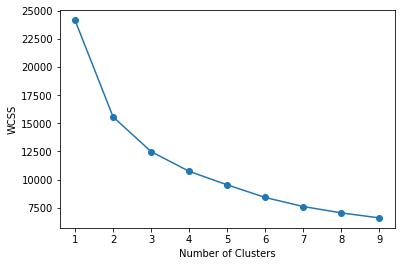

In [43]:
plt.plot(range(1,10), wcss,'-o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS');
# 4

In [44]:
kmeans_final = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(dfnum_pca)

In [45]:
dfnum_pca_kmeans = pd.concat([dfnum.reset_index(drop = True),pd.DataFrame(dfnum_pca)],axis =1)
dfnum_pca_kmeans.columns.values[-4:] = ['Principal Component 1','Principal Component 2','Principal Component 3','Principal Component 4']
dfnum_pca_kmeans['Kmeans Cluster'] = kmeans_final.labels_
dfnum_pca_kmeans.head()


,cases,deaths,cldCvrMin,cldCvrAvg,cldCvrMax,dewPtMin,dewPtAvg,dewPtMax,feelsLikeMin,feelsLikeAvg,...,parks_percent_change_from_baseline,income_2018,pop_2018,day_7_delta_cases,day_7_delta_deaths,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Kmeans Cluster
0,-0.509704,-0.024296,-0.959536,-0.571847,0.242575,0.889439,0.974134,1.070522,1.166349,1.289460,...,-1.260251,-0.428997,-0.308188,0.038655,-0.043333,5.833645,-2.296284,-0.611004,0.172890,0
1,-0.503183,0.545374,-0.952593,-0.540211,0.376829,0.532677,0.565529,0.670108,0.853640,0.887263,...,1.107913,-0.836095,-0.505288,-0.039421,0.443940,4.070372,-2.943700,-1.116547,-0.101365,3
2,-0.861822,-0.593966,-0.931764,-0.592185,0.531737,0.348631,0.428066,0.571487,0.597212,0.730470,...,-0.331427,-1.358886,-0.522946,-0.273649,-1.017877,3.557475,-3.167847,-0.744167,-0.792303,3
3,-0.040213,2.396801,-0.959536,-0.958260,-0.576720,0.786006,0.754261,0.690048,0.646537,0.893548,...,-0.929653,-1.018878,-0.477375,0.241653,1.905756,4.813782,-3.277914,-4.154788,-1.330965,3
4,-0.372769,0.545374,-0.959536,-0.476939,0.758937,1.144575,1.230135,1.331357,1.446175,1.500613,...,-0.095286,-0.646379,-0.474122,0.038655,0.443940,7.020229,-3.255424,-1.542541,-0.663447,0


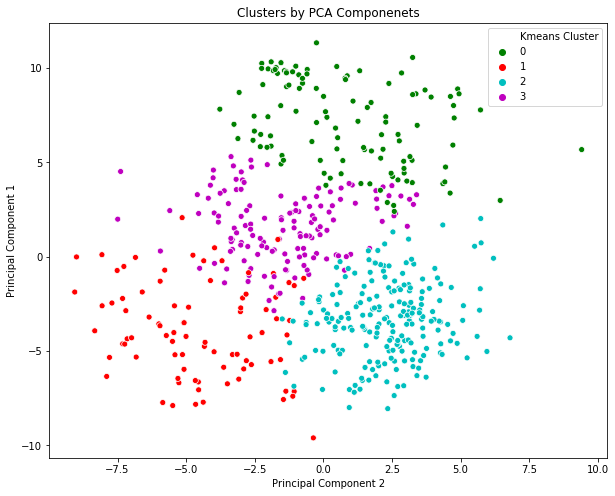

In [46]:
x_axis = dfnum_pca_kmeans['Principal Component 2']
y_axis = dfnum_pca_kmeans['Principal Component 1']
plt.figure(figsize =(10,8))
sns.scatterplot(x_axis, y_axis, hue = dfnum_pca_kmeans['Kmeans Cluster'], palette = ['g','r','c','m'])
plt.title('Clusters by PCA Componenets')
plt.show()

In [20]:
# what counties are in each cluster?


In [21]:
x = pd.DataFrame(final_pca.components_,columns=dfnum.columns,index = ['PC-1','PC-2','PC-3','PC-4'])
x

,cases,deaths,cldCvrMin,cldCvrAvg,cldCvrMax,dewPtMin,dewPtAvg,dewPtMax,feelsLikeMin,feelsLikeAvg,...,retail_and_recreation_percent_change_from_baseline,residential_percent_change_from_baseline,workplaces_percent_change_from_baseline,transit_stations_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,income_2018,pop_2018,day_7_delta_cases,day_7_delta_deaths
PC-1,-0.034945,-0.012864,-0.048936,-0.060723,-0.046697,0.200062,0.203073,0.203012,0.210573,0.212001,...,0.027614,-0.036694,0.026069,0.015810,0.006570,-0.087437,-0.050317,0.008934,-0.018035,-0.019161
PC-2,0.088674,0.018328,0.220579,0.260896,0.215141,0.087843,0.086898,0.087804,0.024540,-0.016448,...,-0.061725,0.087345,-0.036737,-0.055042,-0.045517,0.031921,0.067623,0.032376,0.055178,0.017508
PC-3,-0.051327,-0.044478,-0.000823,0.001507,0.027436,-0.024699,-0.014034,-0.005892,-0.004534,0.015137,...,-0.077991,0.077927,-0.075646,-0.002130,-0.069218,-0.014173,-0.064468,-0.097956,-0.049826,-0.019566
PC-4,0.141177,0.002662,-0.084685,-0.053833,-0.011411,-0.033536,-0.019817,-0.000482,0.000546,0.006390,...,0.359099,-0.332684,0.374011,0.164982,0.346069,0.095298,0.120617,0.222474,0.142259,0.029467


Second Try with features selected by GLM.

In [57]:
df_clean = df[['cases','deaths','grocery_and_pharmacy_percent_change_from_baseline',
             'windSpdMin','parks_percent_change_from_baseline','spcHumMin']].dropna()
df_glm = df_clean
df_glm.head()

,cases,deaths,grocery_and_pharmacy_percent_change_from_baseline,windSpdMin,parks_percent_change_from_baseline,spcHumMin
1,20.875,0.500,-12.500,1.487500,-33.500000,7.250000
14,21.000,1.000,4.500,0.729167,41.714286,6.622917
16,14.125,0.000,-4.125,0.675000,-4.000000,6.250000
17,13.125,0.000,-1.000,0.125000,25.000000,7.137500
18,29.875,2.625,-3.875,0.025000,-23.000000,7.062500


In [26]:
scaler = preprocessing.StandardScaler().fit(df_glm)
df_glm = pd.DataFrame(scaler.fit_transform(df_glm), columns=df_glm.columns)
full_pca_glm = PCA(random_state=0).fit(df_glm)
full_pca_glm.n_components_

6

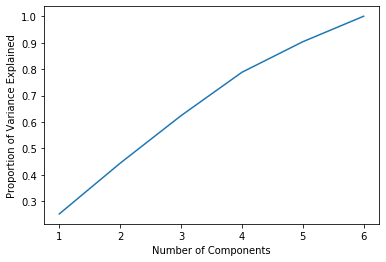

In [27]:
# Calculate the cumulative sum of the variance explained by each component.
cum_exp_var = np.cumsum(full_pca_glm.explained_variance_ratio_)
plt.plot(np.arange(len(cum_exp_var))+1, cum_exp_var)
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance Explained');

In [48]:
final_pca_glm = PCA(4, random_state=0).fit(df_glm)
glm_pca = final_pca_glm.transform(df_glm)

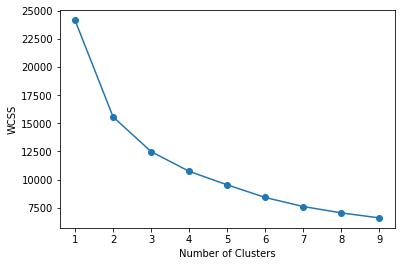

In [49]:
# cross validate number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42).fit(dfnum_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss,'-o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS');

In [51]:
kmeans_final_glm = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(glm_pca)
dfnum_pca_kmeans = pd.concat([df_glm.reset_index(drop = True),pd.DataFrame(glm_pca)],axis =1)
dfnum_pca_kmeans.columns.values[-4:] = ['Principal Component 1','Principal Component 2','Principal Component 3','Principal Component 4']
dfnum_pca_kmeans['Kmeans Cluster'] = kmeans_final_glm.labels_
dfnum_pca_kmeans.head()


,cases,deaths,grocery_and_pharmacy_percent_change_from_baseline,windSpdMin,parks_percent_change_from_baseline,spcHumMin,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Kmeans Cluster
0,-0.423660,-0.014256,-0.205752,-0.094136,-1.158338,0.684047,-1.314104,0.383548,-0.238402,-0.169414,0
1,-0.416754,0.573248,1.267451,-0.660046,1.186192,0.452443,0.862072,-0.188458,-1.426955,0.050365,3
2,-0.796573,-0.601759,0.520017,-0.700468,-0.238784,0.314712,-0.637996,-0.772642,-0.944263,-0.047653,3
3,-0.851819,-0.601759,0.790827,-1.110908,0.665185,0.642497,-0.165070,-1.045562,-1.477444,-0.048302,3
4,0.073557,2.482634,0.541682,-1.185533,-0.831039,0.614797,0.055016,1.901791,-1.338679,-1.589061,0


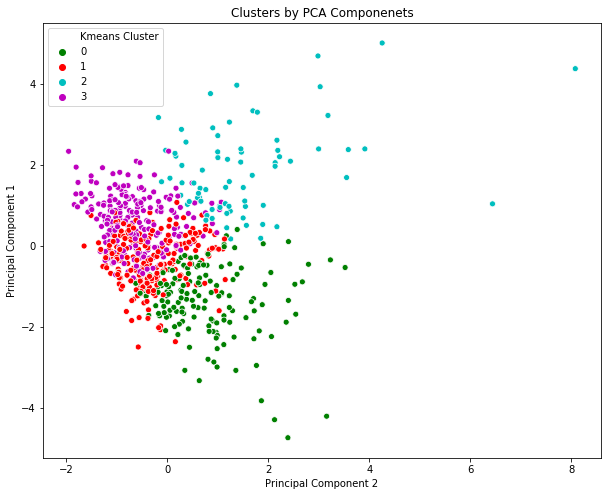

In [52]:
x_axis = dfnum_pca_kmeans['Principal Component 2']
y_axis = dfnum_pca_kmeans['Principal Component 1']
plt.figure(figsize =(10,8))
sns.scatterplot(x_axis, y_axis, hue = dfnum_pca_kmeans['Kmeans Cluster'], palette = ['g','r','c','m'])
plt.title('Clusters by PCA Componenets')
plt.show()

In [54]:
x = pd.DataFrame(final_pca_glm.components_,columns=df_glm.columns,index = ['PC-1','PC-2','PC-3','PC-4'])
x

,cases,deaths,grocery_and_pharmacy_percent_change_from_baseline,windSpdMin,parks_percent_change_from_baseline,spcHumMin
PC-1,0.469995,0.248549,0.290718,-0.055372,0.619492,-0.495957
PC-2,0.510353,0.661098,-0.016555,0.225243,-0.307214,0.396359
PC-3,0.035956,0.005519,-0.698480,0.594338,0.034856,-0.395410
PC-4,0.143669,-0.436955,0.473032,0.705111,0.099481,0.239985


In [58]:
df_clean.index

Int64Index([   1,   14,   16,   17,   18,   22,   24,   26,   27,   30,
            ...
            1440, 1441, 1442, 1444, 1445, 1446, 1447, 1451, 1452, 1454],
           dtype='int64', length=680)

In [76]:
df_clean_kmean = df.iloc[df_clean.index]
df_clean_kmean['Kmeans Cluster'] = kmeans_final_glm.labels_
df_clean_kmean['state_county'] = df_clean_kmean.county +', ' +df_clean_kmean.state
df_clean_kmean.head()

/Users/jzhang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jzhang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,state,county,fips,cases,deaths,cldCvrMin,cldCvrAvg,cldCvrMax,dewPtMin,dewPtAvg,...,workplaces_percent_change_from_baseline,transit_stations_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,income_2018,pop_2018,day_7_delta_cases,day_7_delta_deaths,Kmeans Cluster,state_county
1,alabama,baldwin,1003,20.875,0.500,0.0000,31.250000,86.6250,47.662500,53.725000,...,-31.875,-24.500,-12.500,-33.500000,45596.0,218022.0,17,0,0,"baldwin, alabama"
14,alabama,cullman,1043,21.000,1.000,0.0625,31.833333,89.0625,43.135417,48.777083,...,-34.625,-30.250,4.500,41.714286,39607.0,83442.0,12,1,3,"cullman, alabama"
16,alabama,dekalb,1049,14.125,0.000,0.2500,30.875000,91.8750,40.800000,47.112500,...,-31.000,-37.000,-4.125,-4.000000,31916.0,71385.0,-3,-2,3,"dekalb, alabama"
17,alabama,elmore,1051,13.125,0.000,0.0000,30.125000,83.5000,46.075000,51.425000,...,-35.500,NaN,-1.000,25.000000,42269.0,81887.0,-1,0,3,"elmore, alabama"
18,alabama,etowah,1055,29.875,2.625,0.0000,24.125000,71.7500,46.350000,51.062500,...,-35.625,-31.625,-3.875,-23.000000,36918.0,102501.0,30,4,0,"etowah, alabama"


In [82]:
# counties with top 10 cases in cluster 0
df_clean_kmean[df_clean_kmean['Kmeans Cluster'] == 0].sort_values(by=['cases'],ascending=False).state_county[0:10]

199            miami-dade, florida
1321                 travis, texas
1168    charleston, south carolina
190          hillsborough, florida
1317                tarrant, texas
205            palm beach, florida
260                fulton, georgia
176               broward, florida
1194      richland, south carolina
1267                 dallas, texas
Name: state_county, dtype: object

In [83]:
df_clean_kmean[df_clean_kmean['Kmeans Cluster'] == 1].sort_values(by=['cases'],ascending=False).state_county[0:10]

1159          kent, rhode island
1132     lancaster, pennsylvania
1135        lehigh, pennsylvania
96              kern, california
856           sussex, new jersey
845       gloucester, new jersey
657         livingston, michigan
1113        butler, pennsylvania
848           mercer, new jersey
627     hampshire, massachusetts
Name: state_county, dtype: object

In [86]:
df_clean_kmean[df_clean_kmean['Kmeans Cluster'] == 2].sort_values(by=['cases'],ascending=False).state_county[0:10]

677              wayne, michigan
1161    providence, rhode island
658             macomb, michigan
902             orange, new york
666            oakland, michigan
852            ocean, new jersey
604            carroll, maryland
58             maricopa, arizona
857            union, new jersey
1436        milwaukee, wisconsin
Name: state_county, dtype: object

In [87]:
df_clean_kmean[df_clean_kmean['Kmeans Cluster'] == 3].sort_values(by=['cases'],ascending=False).state_county[0:10]

112           san diego, california
358                  lake, illinois
348                dupage, illinois
964     mecklenburg, north carolina
897                nassau, new york
1269                  denton, texas
846              hudson, new jersey
1019                 hamilton, ohio
872                albany, new york
823                   clark, nevada
Name: state_county, dtype: object